In [1]:
import joblib
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import energies_NN as nn
import numpy as np
from sklearn import model_selection as modsel

In [2]:
# Loading the data
data = joblib.load("cc_kjmol_invdist.bz")
X = data["X"]
y = np.reshape(data["y"], (data["y"].shape[0],))

In [3]:
# Splitting the data
X_train, X_test, y_train, y_test = modsel.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(16558, 21)


In [25]:
# Training the model
estimator = nn.Energies_NN(max_iter=20000, learning_rate_init=0.03, hidden_layer_sizes=(11,), batch_size=1000,
                              alpha= 0.006, tensorboard=False)

In [26]:
estimator.fit(X_train, y_train)

KeyboardInterrupt: 

In [24]:
print("First layer weights:")
weights1 = estimator.all_weights[1][0]
print(estimator.all_weights[0][0])
print("First layer biases:")
print(estimator.all_biases[0])
print("Second layer weights:")
print(weights1)
print("Max and min value of second layer weights:")
print(weights1.max(), weights1.min())
print("Second layer bias:")
print(estimator.all_biases[1])

First layer weights:
[-12.62804508  -0.85432088  -6.29442835 -10.51080036 -40.22581863
 -54.10654831   3.65710735  -0.65532726   2.82326937  14.17276382
  15.46159172   1.94398594   4.60205412  34.03565598 -13.76210117
  10.45668125  -9.6974926   22.34246063 -12.19768143  25.58576965
 -23.04684448]
First layer biases:
[ 36.80805588 -40.52075958  28.28897476  18.33816338  19.14291573
  18.89640999   0.82410616 -11.50610447  14.6747427   -2.81381893
  -7.11591291]
Second layer weights:
[  57.72915268 -150.76473999   40.14274216  -34.10558319  -25.525774
   83.22516632 -141.08094788  -55.37108231  -62.27566528  -88.6996994
  107.34689331]
Max and min value of second layer weights:
107.347 -150.765
Second layer bias:
[ 66.33287048]


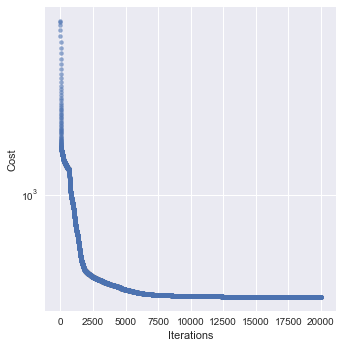

In [16]:
estimator.plot_cost()

In [17]:
estimator.scoreFull(X_test, y_test)

(0.94102096979720939,
 18.846003855785785,
 13.792872772004429,
 109.29203265300021,
 150.54409226216376)

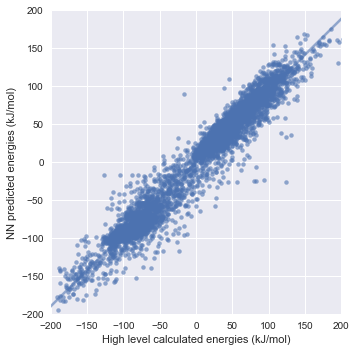

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
y_pred = estimator.predict(X_test)
df = pd.DataFrame()
df['High level calculated energies (kJ/mol)'] = y_test
df['NN predicted energies (kJ/mol)'] = y_pred
lm = sns.lmplot('High level calculated energies (kJ/mol)', 'NN predicted energies (kJ/mol)', data=df,
                scatter_kws={"s": 20, "alpha": 0.6}, line_kws={"alpha": 0.5})
lm.set(ylim=(-200,200), xlim=(-200,200))
plt.show()

In [19]:
np.random.seed(seed=1)
random_input = abs(np.random.rand(21))
print(random_input.shape)

(21,)


/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


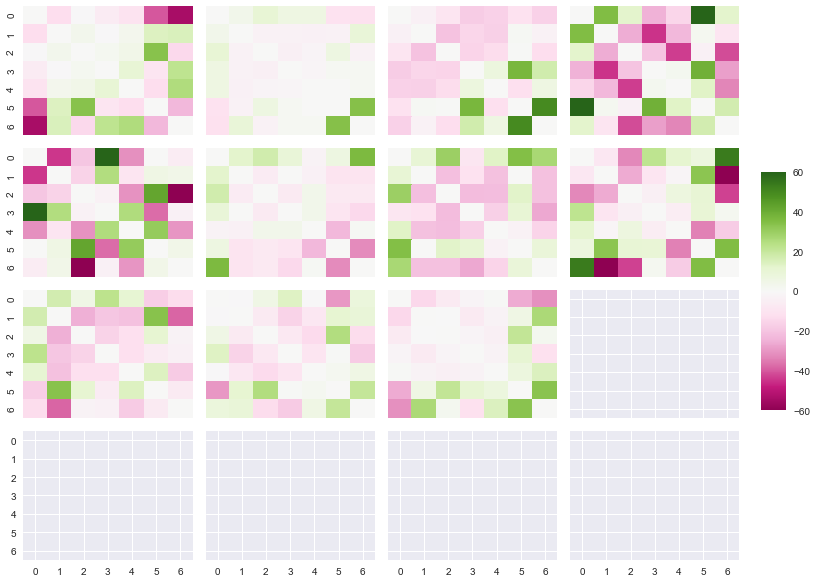

In [20]:
estimator.plotWeights_no_diag()

Input before opt:
[[  4.17021990e-01   7.20324516e-01   1.14374816e-04   3.02332580e-01
    1.46755889e-01   9.23385918e-02   1.86260208e-01   3.45560730e-01
    3.96767467e-01   5.38816750e-01   4.19194520e-01   6.85219526e-01
    2.04452246e-01   8.78117442e-01   2.73875929e-02   6.70467496e-01
    4.17304814e-01   5.58689833e-01   1.40386939e-01   1.98101491e-01
    8.00744593e-01]]
Input after reset:
[[ 0.49077451  0.68820542 -0.00288829  0.43424869  0.29539928  0.19697277
   0.4326376   0.52486926  0.63226634  0.34632158  0.15132137  0.87823164
   0.36311585  0.5423786   0.18847817  0.63324821  0.33841273  0.7883355
   0.10527514  0.13807946  0.58734131]]
Input before opt:
[[  4.17021990e-01   7.20324516e-01   1.14374816e-04   3.02332580e-01
    1.46755889e-01   9.23385918e-02   1.86260208e-01   3.45560730e-01
    3.96767467e-01   5.38816750e-01   4.19194520e-01   6.85219526e-01
    2.04452246e-01   8.78117442e-01   2.73875929e-02   6.70467496e-01
    4.17304814e-01   5.58689833e-

/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


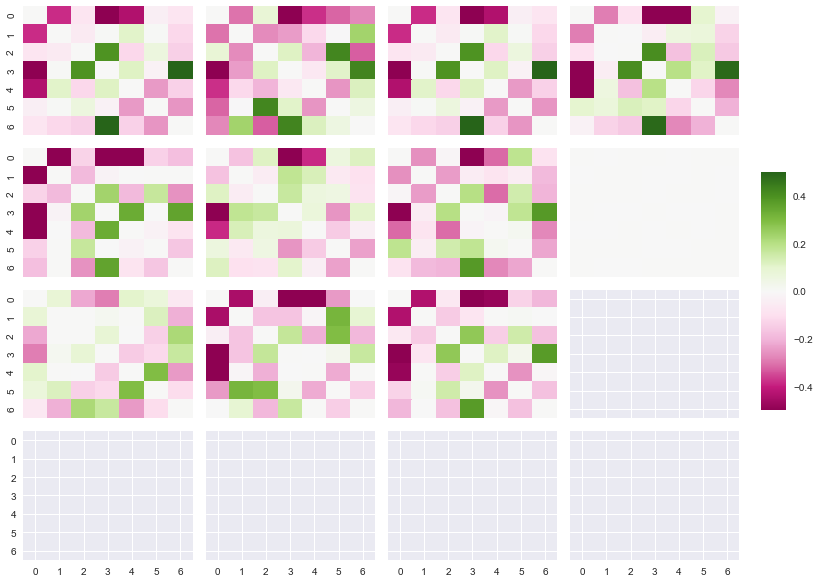

In [21]:
the_mean = np.mean(X_train, axis=0)
estimator.isVisReady = False
# alpha_l1 = [0.0001, 0.0000001, 0.001, 0.05, 0.005, 0.005, 0.1, 0.5, 0.05, 0.01, 0.0000001, 0.0000005, 0.0000001] 
# alpha_l1 = [1.0, 0.001, 0.0000001, 0.0000001, 0.01, 0.0000001, 1.0, 0.0000001, 0.0001, 0.005, 1.0, 0.0000001, 0.000001]
# alpha_l1 =  [0.05, 1.0, 0.005, 0.0000001, 1.0, 0.0000001, 1.0, 0.05, 0.0000001, 0.05, 0.0000001, 0.01, 0.0001]
alpha_l1 = [0.00005]
## New reg L1
# alpha_l1 = [0.0005, 0.01, 0.01, 1.0, 1.0, 1.0, 1.0, 0.001, 0.01, 0.01, 1.0, 1.0, 1.0]

alpha_l2=0.0

if estimator.isVisReady == False:
    estimator.x_square_tot = estimator.optimise_input_no_diag(random_input, alpha_l1, alpha_l2, the_mean, 6000, 0.0005)

max_val = np.amax(estimator.x_square_tot)
min_val = np.amin(estimator.x_square_tot)

n = int(np.ceil(np.sqrt(estimator.hidden_layer_sizes[0])))
additional = n ** 2 - estimator.hidden_layer_sizes[0]

fig, axn = plt.subplots(n, n, sharex=True, sharey=True)
fig.set_size_inches(11.7, 8.27)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
counter = 0

for i, ax in enumerate(axn.flat):
    df = pd.DataFrame(estimator.x_square_tot[counter])
    ax.set(xticks=[], yticks=[])
    sns.heatmap(df, ax=ax, cbar=i == 0, cmap='PiYG',
                vmax=0.5, vmin=-0.5,
                cbar_ax=None if i else cbar_ax)
    counter = counter + 1
    if counter >= estimator.hidden_layer_sizes[0]:
        break

fig.tight_layout(rect=[0, 0, 0.9, 1])
# if write_plot==True:
#     fig.savefig("high_a1_input.png", transparent=False, dpi=600)
plt.show()

In [ ]:
# estimator.isVisReady = False
estimator.vis_input_network_no_diag(random_input, alpha_l1=0.0001, alpha_l2=0.0, write_plot=False)

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

matrix = estimator.x_square_tot

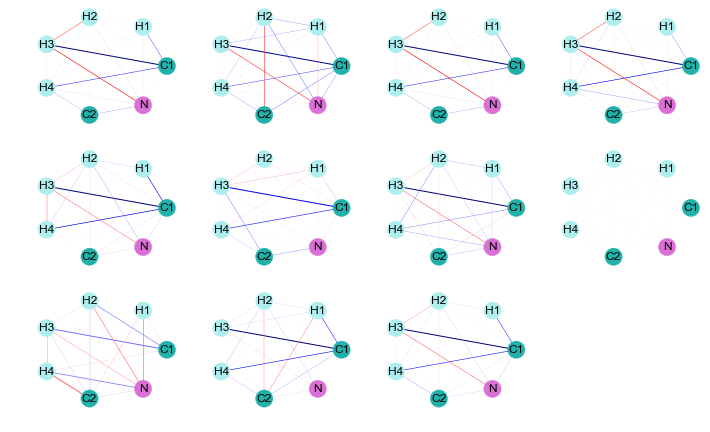

In [23]:
# for i in range(len(estimator.x_square_tot)):
#     matrix[i] = estimator.x_square_tot[i] * estimator.all_weights[1][0][i] * 0.001

# for i in range(len(estimator.x_square_tot)):
#     matrix[i] = matrix[i] * 0.1

# max_val = np.amax(matrix)
# min_val = np.amin(matrix)


n = int(np.ceil(np.sqrt(estimator.hidden_layer_sizes)))

fig = plt.figure(figsize=(12, 10))
for i in range(n**2):
    if i >= estimator.hidden_layer_sizes[0]:
        break
    fig.add_subplot(n,n,1+i)
    A = np.matrix(matrix[i])
    graph2 = nx.from_numpy_matrix(A, parallel_edges=False)
    

    labels = {}
    labels[0] = 'C1'
    labels[1] = 'H1'
    labels[2] = 'H2'
    labels[3] = 'H3'
    labels[4] = 'H4'
    labels[5] = 'C2'
    labels[6] = 'N'

    colors = ["lightseagreen", "paleturquoise", "paleturquoise", "paleturquoise", "paleturquoise", "lightseagreen", "orchid"]

    # edges widths
    edgewidth = [abs(d['weight']) for (u, v, d) in graph2.edges(data=True)]
    if len(edgewidth) > 0:
        if len(edgewidth)==1:
            norm_fact = edgewidth[0]
        else:
            norm_fact = max(edgewidth)
        edge_std_list = np.ones(len(edgewidth)) * norm_fact
        edgewidth = edgewidth/edge_std_list
        
    # Added so that the negative and positive features have different colours     
    edgecolours = [d['weight'] for (u, v, d) in graph2.edges(data=True)]

    plt.axis('off')
    nx.draw_circular(graph2,
                     width=edgewidth,
                     with_labels=True, 
                     labels=labels, 
                     node_color=colors,
                     edge_color=edgecolours, 
                     edge_cmap=plt.cm.seismic,
                     edge_vmin=-1,
                     edge_vmax=1
                     )

# plt.savefig("mod1tot_noweight.png", dpi=200)  # save as png

plt.show()  # display

In [ ]:
# plt.savefig("mod1tot_noweight.png", dpi=200)  # save as png

In [ ]:
# Loading the 3 structure data
data = joblib.load("three_struct.bz")
X_three = data["X_id"]
print(X_three)

In [ ]:
activations = estimator.max_act(X_three)
print(activations)

In [ ]:
dfc = pd.DataFrame()

dfc["node0"]=activations[0,:]
dfc["node1"]=activations[1,:]
dfc["node2"]=activations[2,:]
dfc["node_list"] = range(3)

In [ ]:
fig, ax = plt.subplots()
sns.barplot( x=dfc["node_list"], y=dfc["node0"] , color="skyblue", label="CH4_CN")
ax.set(xlabel='Node', ylabel='Activation')
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.barplot( x=dfc["node_list"], y=dfc["node1"] , color="skyblue", label="CH3-H-CN")
ax.set(xlabel='Node', ylabel='Activation')
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.barplot( x=dfc["node_list"], y=dfc["node2"] , color="skyblue", label="CH3_HCN")
ax.set(xlabel='Node', ylabel='Activation')
plt.show()

In [ ]:
activations_all = estimator.max_act(X)

In [ ]:
print("The max and min activations for neuron 0 are:")
print(max(activations_all[:,0]), min(activations_all[:,0]))

print("The max and min activations for neuron 1 are:")
print(max(activations_all[:,1]), min(activations_all[:,1]))

print("The max and min activations for neuron 2 are:")
print(max(activations_all[:,2]), min(activations_all[:,2]))